In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("datasets", labels='inferred', image_size=(128,128), batch_size = 64, shuffle = True)

class_names = dataset.class_names
print("Labels:", class_names)

Found 3000 files belonging to 3 classes.
Labels: ['among_us', 'csgo', 'lol']


In [3]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

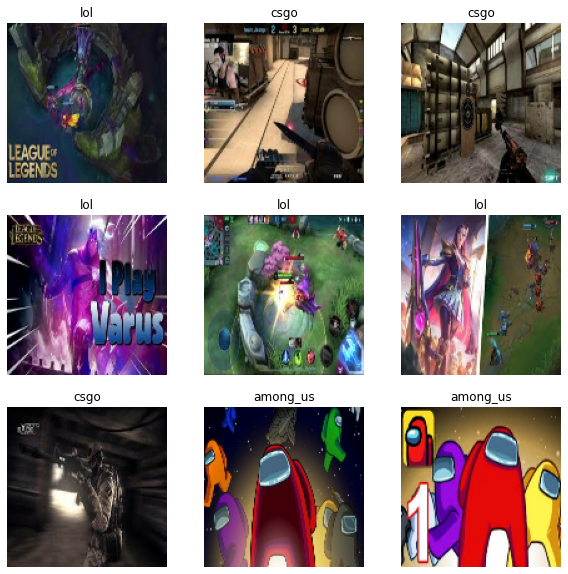

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
def dataset_to_array(dataset):
    """From tensorflow.Dataset to numpy_array of relevant shapes."""
    dataset_to_numpy = list(dataset.as_numpy_iterator())
    counter = 0
    images = []
    labels = []
    for i in range(len(dataset)):
        images.append(dataset_to_numpy[i][0]) 
        labels.append(dataset_to_numpy[i][1])
    return np.concatenate(images, axis=0), np.concatenate(labels, axis=0).reshape(3000,1)

img, target = dataset_to_array(dataset)

print("Dataset shape:", img.shape)
print("Target shape:", target.shape)

Dataset shape: (3000, 128, 128, 3)
Target shape: (3000, 1)


In [6]:
dim_data = np.prod(img.shape[1:])
img_flat = img.reshape(img.shape[0], dim_data)/255.0


In [7]:
target_ohe = to_categorical(target)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(img_flat, target_ohe, test_size = 0.1, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

tf.keras.backend.clear_session()
mlp = Sequential()
mlp.add(Dense(256, activation='selu', input_shape=(dim_data,)))
# model.add(Dropout(0.5))
mlp.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
mlp.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
mlp.add(Dense(3, activation='softmax'))

mlp.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = mlp.fit(X_train, y_train, batch_size=256, epochs=10, verbose=1,validation_data=(X_test, y_test))

[test_loss_mlp, test_acc_mlp] = mlp.evaluate(X_test, y_test)

X_train shape: (2700, 49152)
X_test shape: (300, 49152)
y_train shape: (2700, 3)
y_test shape: (300, 3)
Epoch 1/10
11/11 [==============================] - 2s 169ms/step - loss: 9.6334 - accuracy: 0.3515 - val_loss: 8.7752 - val_accuracy: 0.3100
Epoch 2/10
11/11 [==============================] - 2s 175ms/step - loss: 6.6229 - accuracy: 0.3496 - val_loss: 3.3152 - val_accuracy: 0.3500
Epoch 3/10
11/11 [==============================] - 2s 159ms/step - loss: 4.0842 - accuracy: 0.4274 - val_loss: 3.6272 - val_accuracy: 0.3400
Epoch 4/10
11/11 [==============================] - 2s 154ms/step - loss: 1.8938 - accuracy: 0.4181 - val_loss: 1.3000 - val_accuracy: 0.4567
Epoch 5/10
11/11 [==============================] - 2s 156ms/step - loss: 1.0202 - accuracy: 0.5644 - val_loss: 0.9155 - val_accuracy: 0.5800
Epoch 6/10
11/11 [==============================] - 2s 166ms/step - loss: 0.8755 - accuracy: 0.6263 - val_loss: 0.8221 - val_accuracy: 0.6467
Epoch 7/10
11/11 [==========================

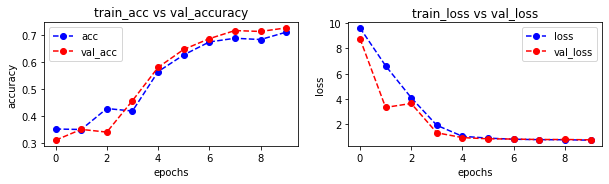

In [9]:
plot_accuracy_loss(history)

X_train shape: (2700, 128, 128, 3)
X_test shape: (300, 128, 128, 3)
y_train shape: (2700, 3)
y_test shape: (300, 3)
Epoch 1/10
85/85 [==============================] - 9s 107ms/step - loss: 1.6344 - accuracy: 0.6052 - val_loss: 0.6052 - val_accuracy: 0.7500
Epoch 2/10
85/85 [==============================] - 9s 106ms/step - loss: 0.4112 - accuracy: 0.8511 - val_loss: 0.4985 - val_accuracy: 0.8100
Epoch 3/10
85/85 [==============================] - 9s 104ms/step - loss: 0.1924 - accuracy: 0.9400 - val_loss: 0.5428 - val_accuracy: 0.8033
Epoch 4/10
85/85 [==============================] - 9s 106ms/step - loss: 0.0915 - accuracy: 0.9807 - val_loss: 0.5707 - val_accuracy: 0.8067
Epoch 5/10
85/85 [==============================] - 9s 106ms/step - loss: 0.0419 - accuracy: 0.9933 - val_loss: 0.6267 - val_accuracy: 0.8267
Epoch 6/10
85/85 [==============================] - 9s 107ms/step - loss: 0.0213 - accuracy: 0.9978 - val_loss: 0.5639 - val_accuracy: 0.8167
Epoch 7/10
85/85 [==============

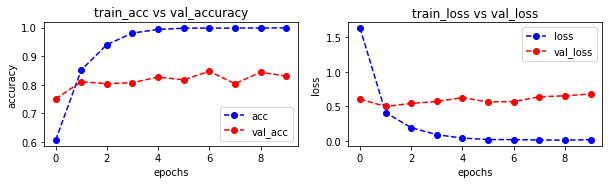

In [10]:
X_train, X_test, y_train, y_test = train_test_split(img/255.0, target_ohe, test_size = 0.1, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

tf.keras.backend.clear_session()
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
[test_loss, test_acc] = cnn.evaluate(X_test, y_test)

plot_accuracy_loss(hist)

In [12]:
print("Evaluation result on Test Data for MLP (10 epoch) : Loss = {}, accuracy = {}".format(test_loss_mlp, test_acc_mlp))

print("Evaluation result on Test Data for CNN (10 epoch) : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data for MLP (10 epoch) : Loss = 0.7389804124832153, accuracy = 0.7266666889190674
Evaluation result on Test Data for CNN (10 epoch) : Loss = 0.678777277469635, accuracy = 0.8299999833106995
